In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

sys.path.insert(1, '../src')

# Set the working directory to the root of the project
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
os.chdir(parent_dir)

print(f'Current working directory: {os.getcwd()}')

Current working directory: /home/jprodanov/resource-elastisity-nancy


In [2]:
from matplotlib import rc
from matplotlib.ticker import FuncFormatter

rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

In [3]:
algorithms = ['thold', 'dqn', 'ppo', 'ddpg']
# algorithms = [ 'dqn', 'ppo', 'ddpg']
# algorithms = ['ddpg']
# algorithms = ['ppo']
# folder = 'monte_carlo_21_lhm'
folder = '21_lhm_all'
# folder = 'monte_carlo_21_hml'

mean_crec_alg = pickle.load(open(f'results/generated/priority/{folder}/mean_crec_alg.p', 'rb'))
mean_rts_alg = pickle.load(open(f'results/generated/priority/{folder}/mean_rts_alg.p', 'rb'))



In [8]:
deltas_0 = pickle.load(open(f'results/generated/priority/{folder}/deltas_0.p', 'rb'))
deltas_1 = pickle.load(open(f'results/generated/priority/{folder}/deltas_1.p', 'rb'))
deltas_2 = pickle.load(open(f'results/generated/priority/{folder}/deltas_2.p', 'rb'))
all_response_times = pickle.load(open(f'results/generated/priority/{folder}/all_response_times.p', 'rb'))


In [66]:
# algorithms = ['thold', 'dqn', 'ppo', 'ddpg']
# algorithms = [ 'dqn', 'ppo', 'ddpg']
# algorithms = ['ddpg']
# algorithms = ['ppo']
folder = 'ddpg_monte_carlo_21_hml'

ddpg_mean_crec_alg = pickle.load(open(f'results/generated/priority/{folder}/mean_crec_alg.p', 'rb'))
ddpg_mean_rts_alg = pickle.load(open(f'results/generated/priority/{folder}/mean_rts_alg.p', 'rb'))
ddpg_deltas_0 = pickle.load(open(f'results/generated/priority/{folder}/deltas_0.p', 'rb'))
ddpg_deltas_1 = pickle.load(open(f'results/generated/priority/{folder}/deltas_1.p', 'rb'))
ddpg_deltas_2 = pickle.load(open(f'results/generated/priority/{folder}/deltas_2.p', 'rb'))
ddpg_all_response_times = pickle.load(open(f'results/generated/priority/{folder}/all_response_times.p', 'rb'))

mean_crec_alg['ddpg'] = ddpg_mean_crec_alg['ddpg']
mean_rts_alg['ddpg'] = ddpg_mean_rts_alg['ddpg']
deltas_0['ddpg'] = ddpg_deltas_0['ddpg']
deltas_1['ddpg'] = ddpg_deltas_1['ddpg']
deltas_2['ddpg'] = ddpg_deltas_2['ddpg']
all_response_times['ddpg'] = ddpg_all_response_times['ddpg']



In [62]:

# folder_path = f'results/generated/priority/21_hml_all'
# pickle.dump(mean_crec_alg, open(os.path.join(folder_path, 'mean_crec_alg.p'), 'wb'))
# pickle.dump(mean_rts_alg, open(os.path.join(folder_path, 'mean_rts_alg.p'), 'wb'))

# pickle.dump(all_response_times, open(os.path.join(folder_path, 'all_response_times.p'), 'wb'))
# pickle.dump(deltas_0, open(os.path.join(folder_path, 'deltas_0.p'), 'wb'))
# pickle.dump(deltas_1, open(os.path.join(folder_path, 'deltas_1.p'), 'wb'))
# pickle.dump(deltas_2, open(os.path.join(folder_path, 'deltas_2.p'), 'wb'))
    

priorities are [0.1, 1.0, 0.5], loads are the same


In [72]:
for alg in algorithms:
    for service in range(3):
        print(f"{alg}")
        # cpu_percentages = [entry[service][2] for entry in mean_crec_alg[alg]]
        # print(f" mean of {np.mean(cpu_percentages):.2f}% CPU usage for service {service}")

        # cpu_limits = [entry[service][0] for entry in mean_crec_alg[alg]]
        # share = np.mean(cpu_limits)/10 # Max is 1000, and we need percentage
        # print(f" mean of {share:.2f}% CPU shares for service {service}")
        
        mean_rts = mean_rts_alg[alg][service + 1]
        # mean_rts = all_response_times[alg][service + 1]
        print(f" mean of {np.mean(mean_rts):.2f}s response times for service {service} ")

        response_times = all_response_times[alg][service + 1]
        # if alg != 'ddpg':
        #     response_times = np.concatenate([np.array(rt) for rt in all_response_times[alg][service + 1]]) 
        response_times = np.array(response_times)
        above025 = (np.sum(response_times > 0.25) / 
                    len(response_times)) * 100
        print(f" {above025:.2f}% of response times more than 0.25s for service {service}")

        match service:
            case 0:
                deltas = deltas_0[alg]
            case 1:
                deltas = deltas_1[alg]
            case 2:
                deltas = deltas_2[alg]
        print(f" mean of {np.mean(deltas):.2f}s delta for service {service}")

        print()


dqn
 mean of 0.09s response times for service 0 
 5.80% of response times more than 0.25s for service 0
 mean of 477.38s delta for service 0

dqn
 mean of 0.25s response times for service 1 
 22.39% of response times more than 0.25s for service 1
 mean of 379.76s delta for service 1

dqn
 mean of 0.22s response times for service 2 
 16.07% of response times more than 0.25s for service 2
 mean of 480.95s delta for service 2

ppo
 mean of 0.09s response times for service 0 
 6.19% of response times more than 0.25s for service 0
 mean of 312.00s delta for service 0

ppo
 mean of 0.31s response times for service 1 
 22.61% of response times more than 0.25s for service 1
 mean of 498.51s delta for service 1

ppo
 mean of 0.27s response times for service 2 
 19.36% of response times more than 0.25s for service 2
 mean of 482.78s delta for service 2

ddpg
 mean of 0.32s response times for service 0 
 30.63% of response times more than 0.25s for service 0
 mean of 1894.10s delta for service 0


In [10]:
for alg in algorithms:
    print(f"\nALG {alg} has mean of {np.mean(np.array(list(mean_rts_alg[str(alg)].values())).flatten())}s "
          f"response times")


ALG thold has mean of 0.29064767151515153s response times

ALG dqn has mean of 0.27040690787878785s response times

ALG ppo has mean of 0.29749064636363637s response times

ALG ddpg has mean of 0.2357987972727273s response times


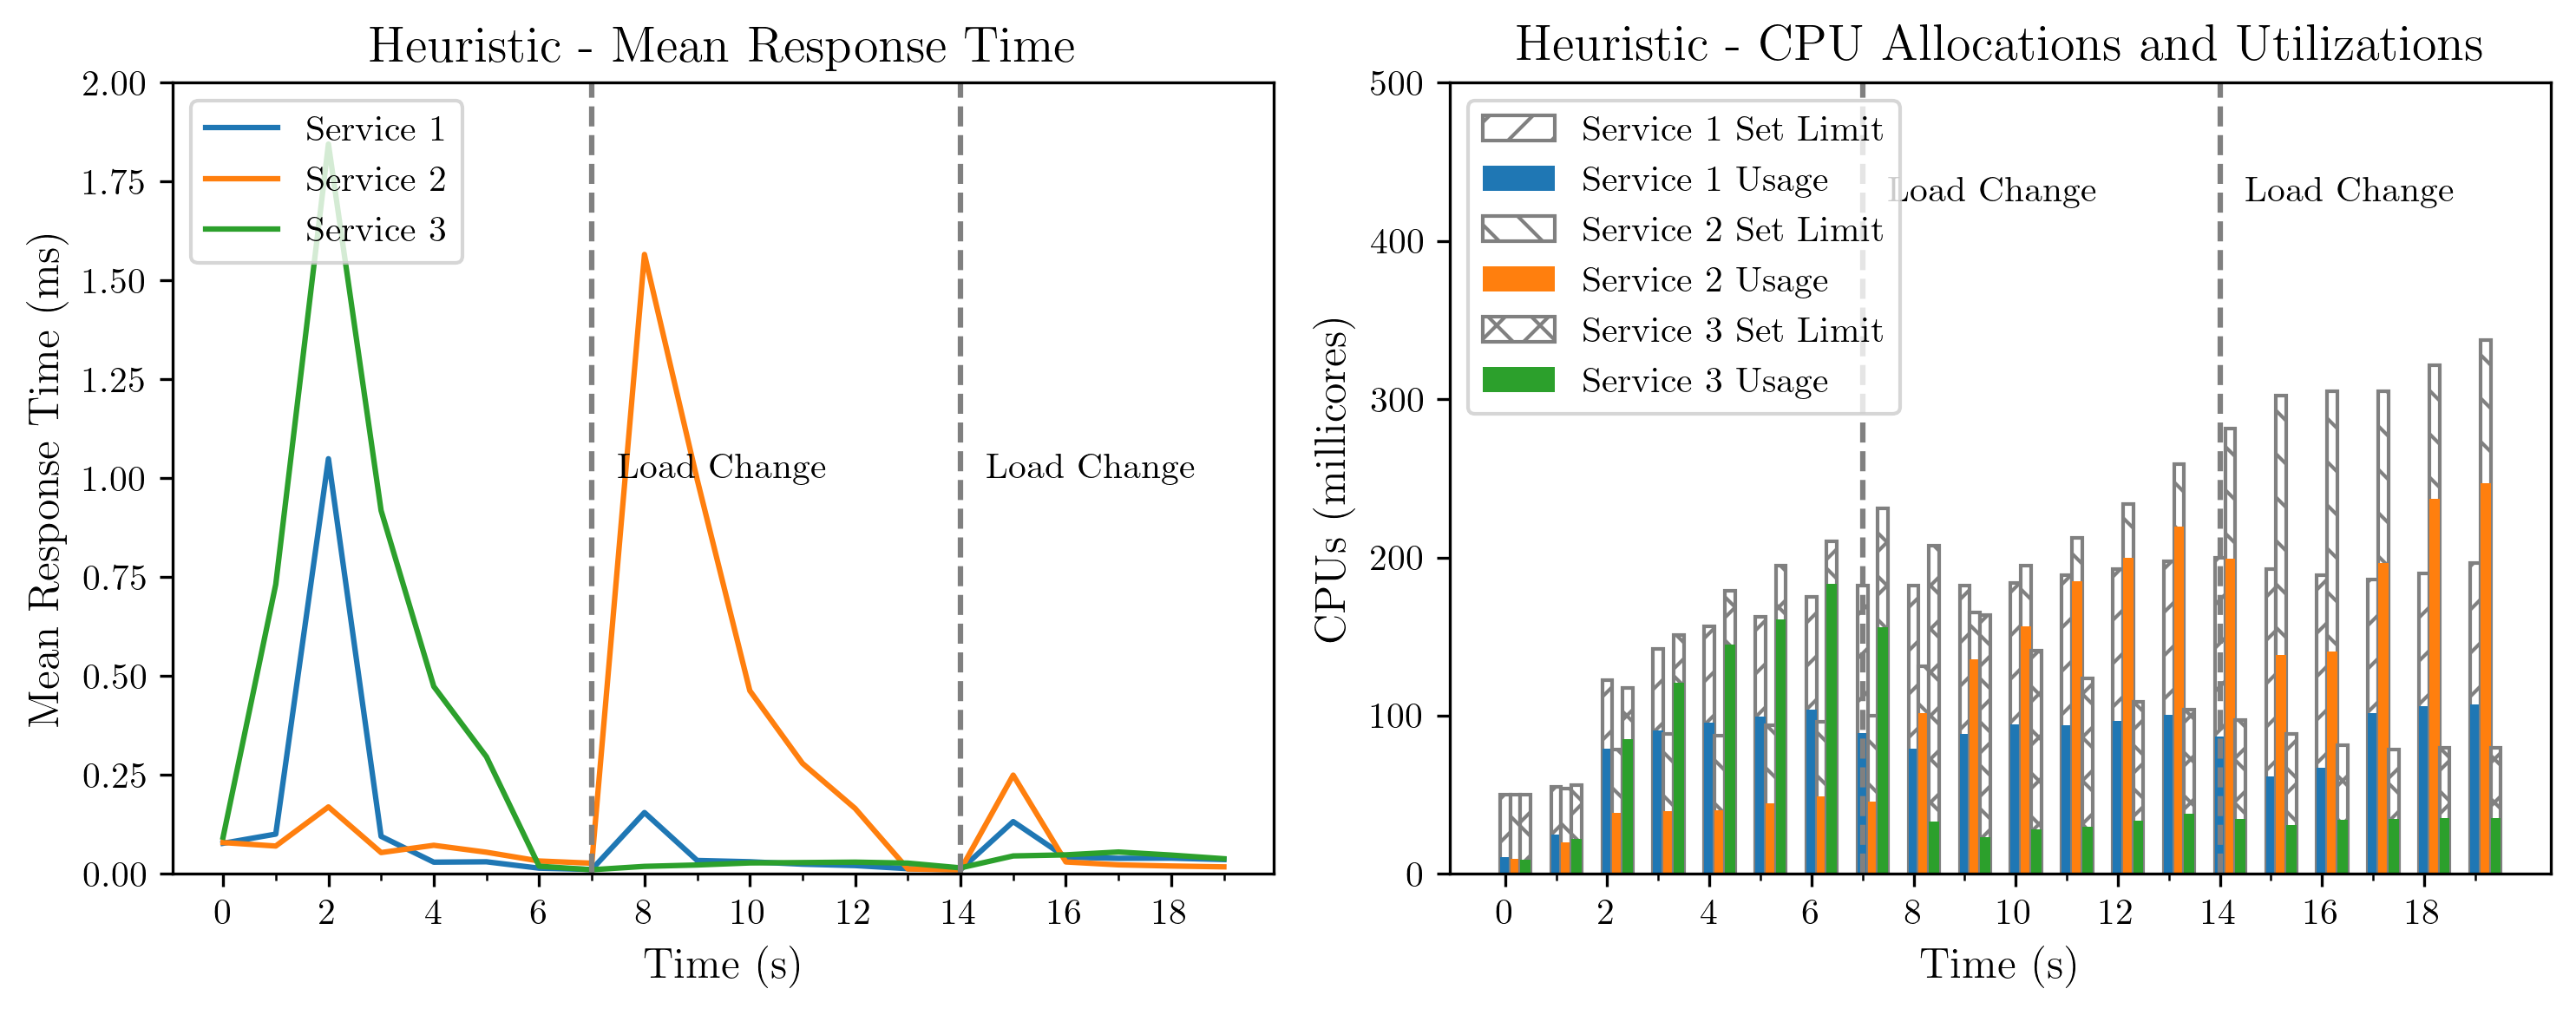

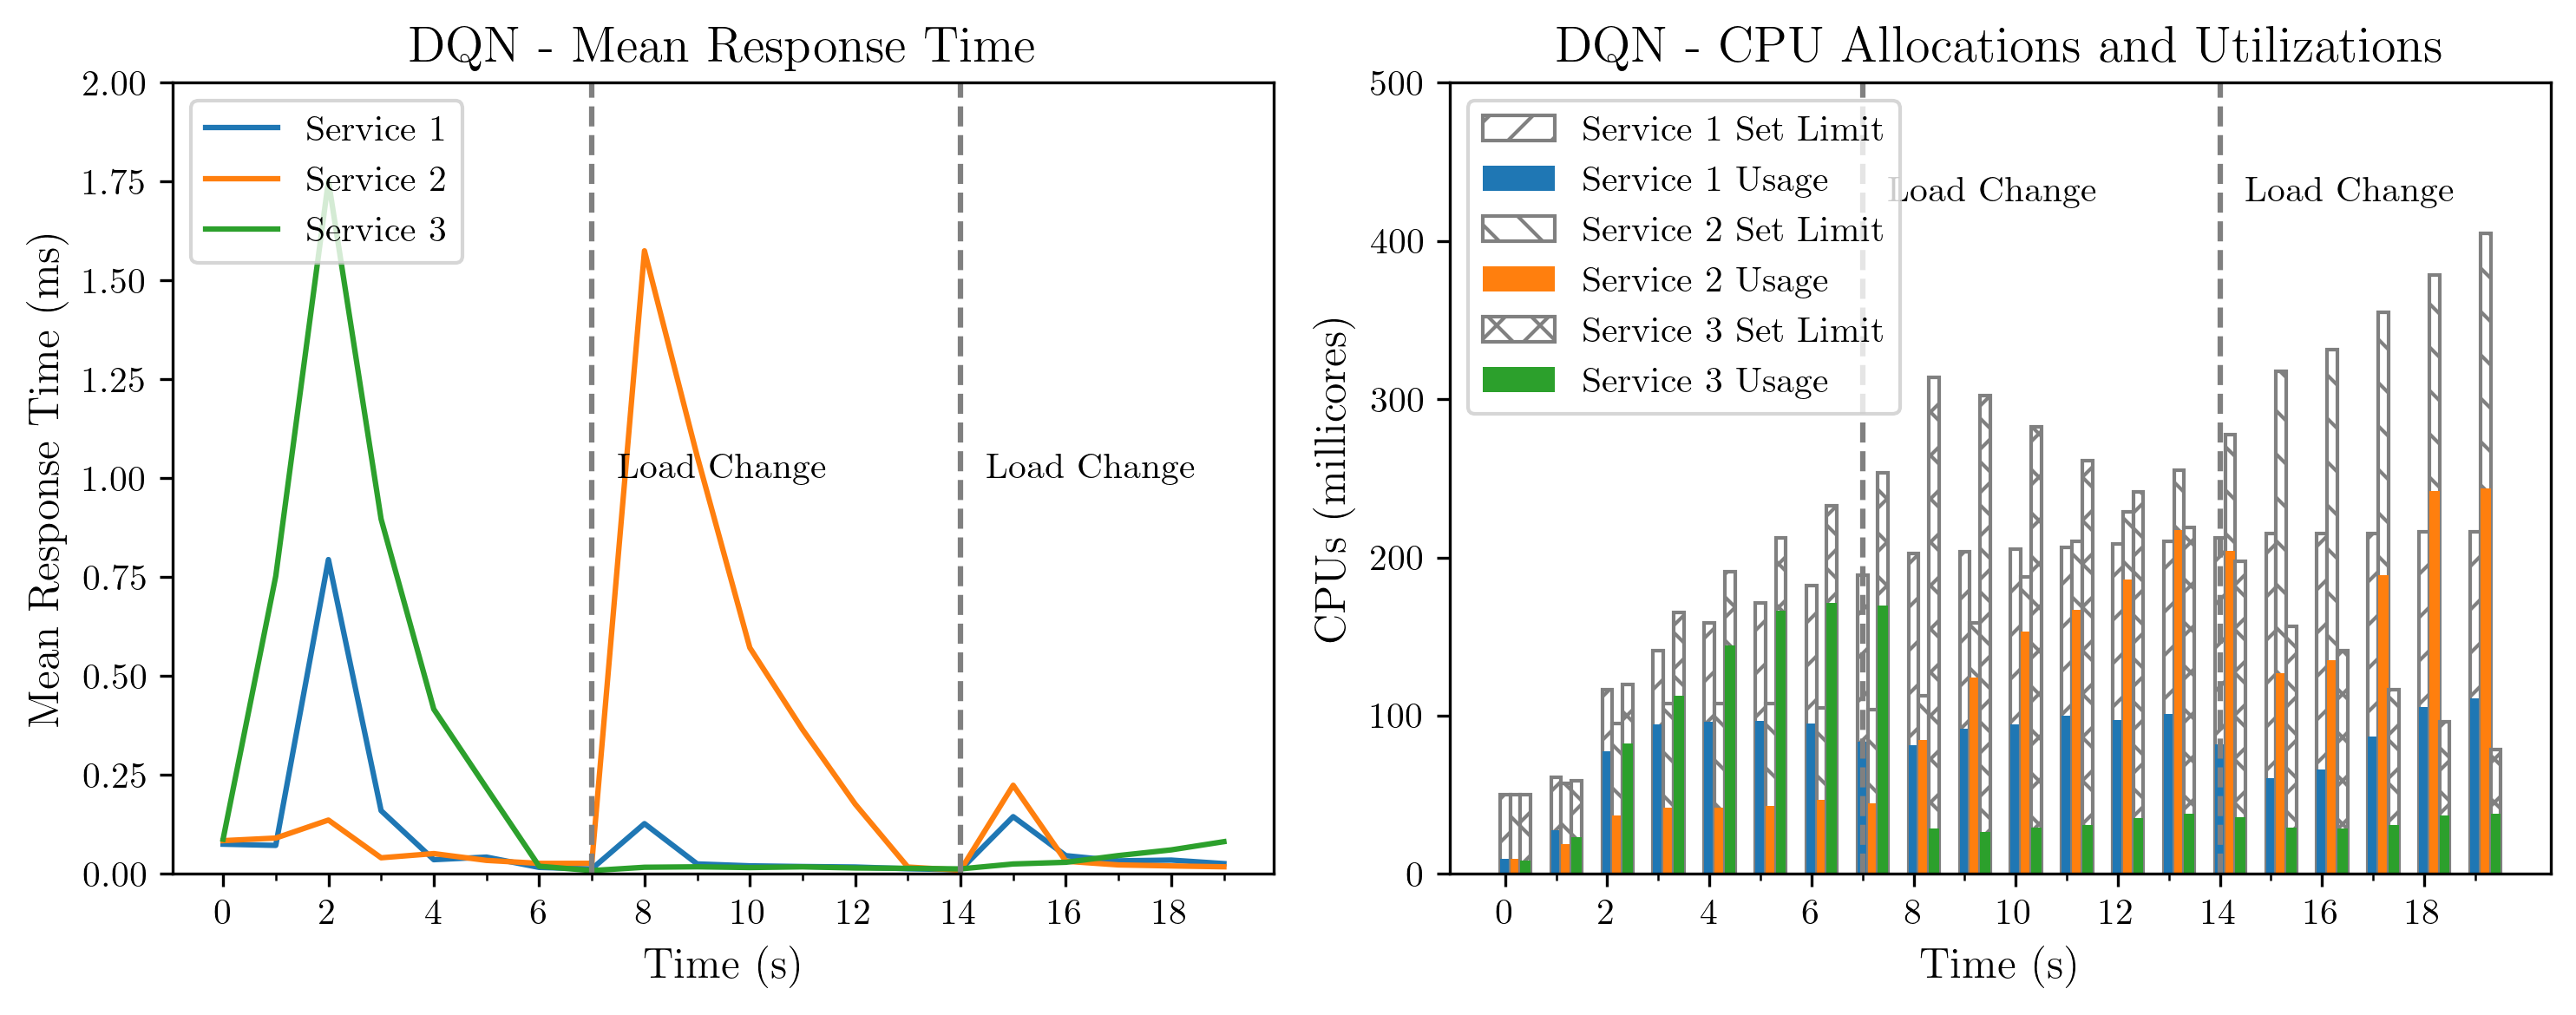

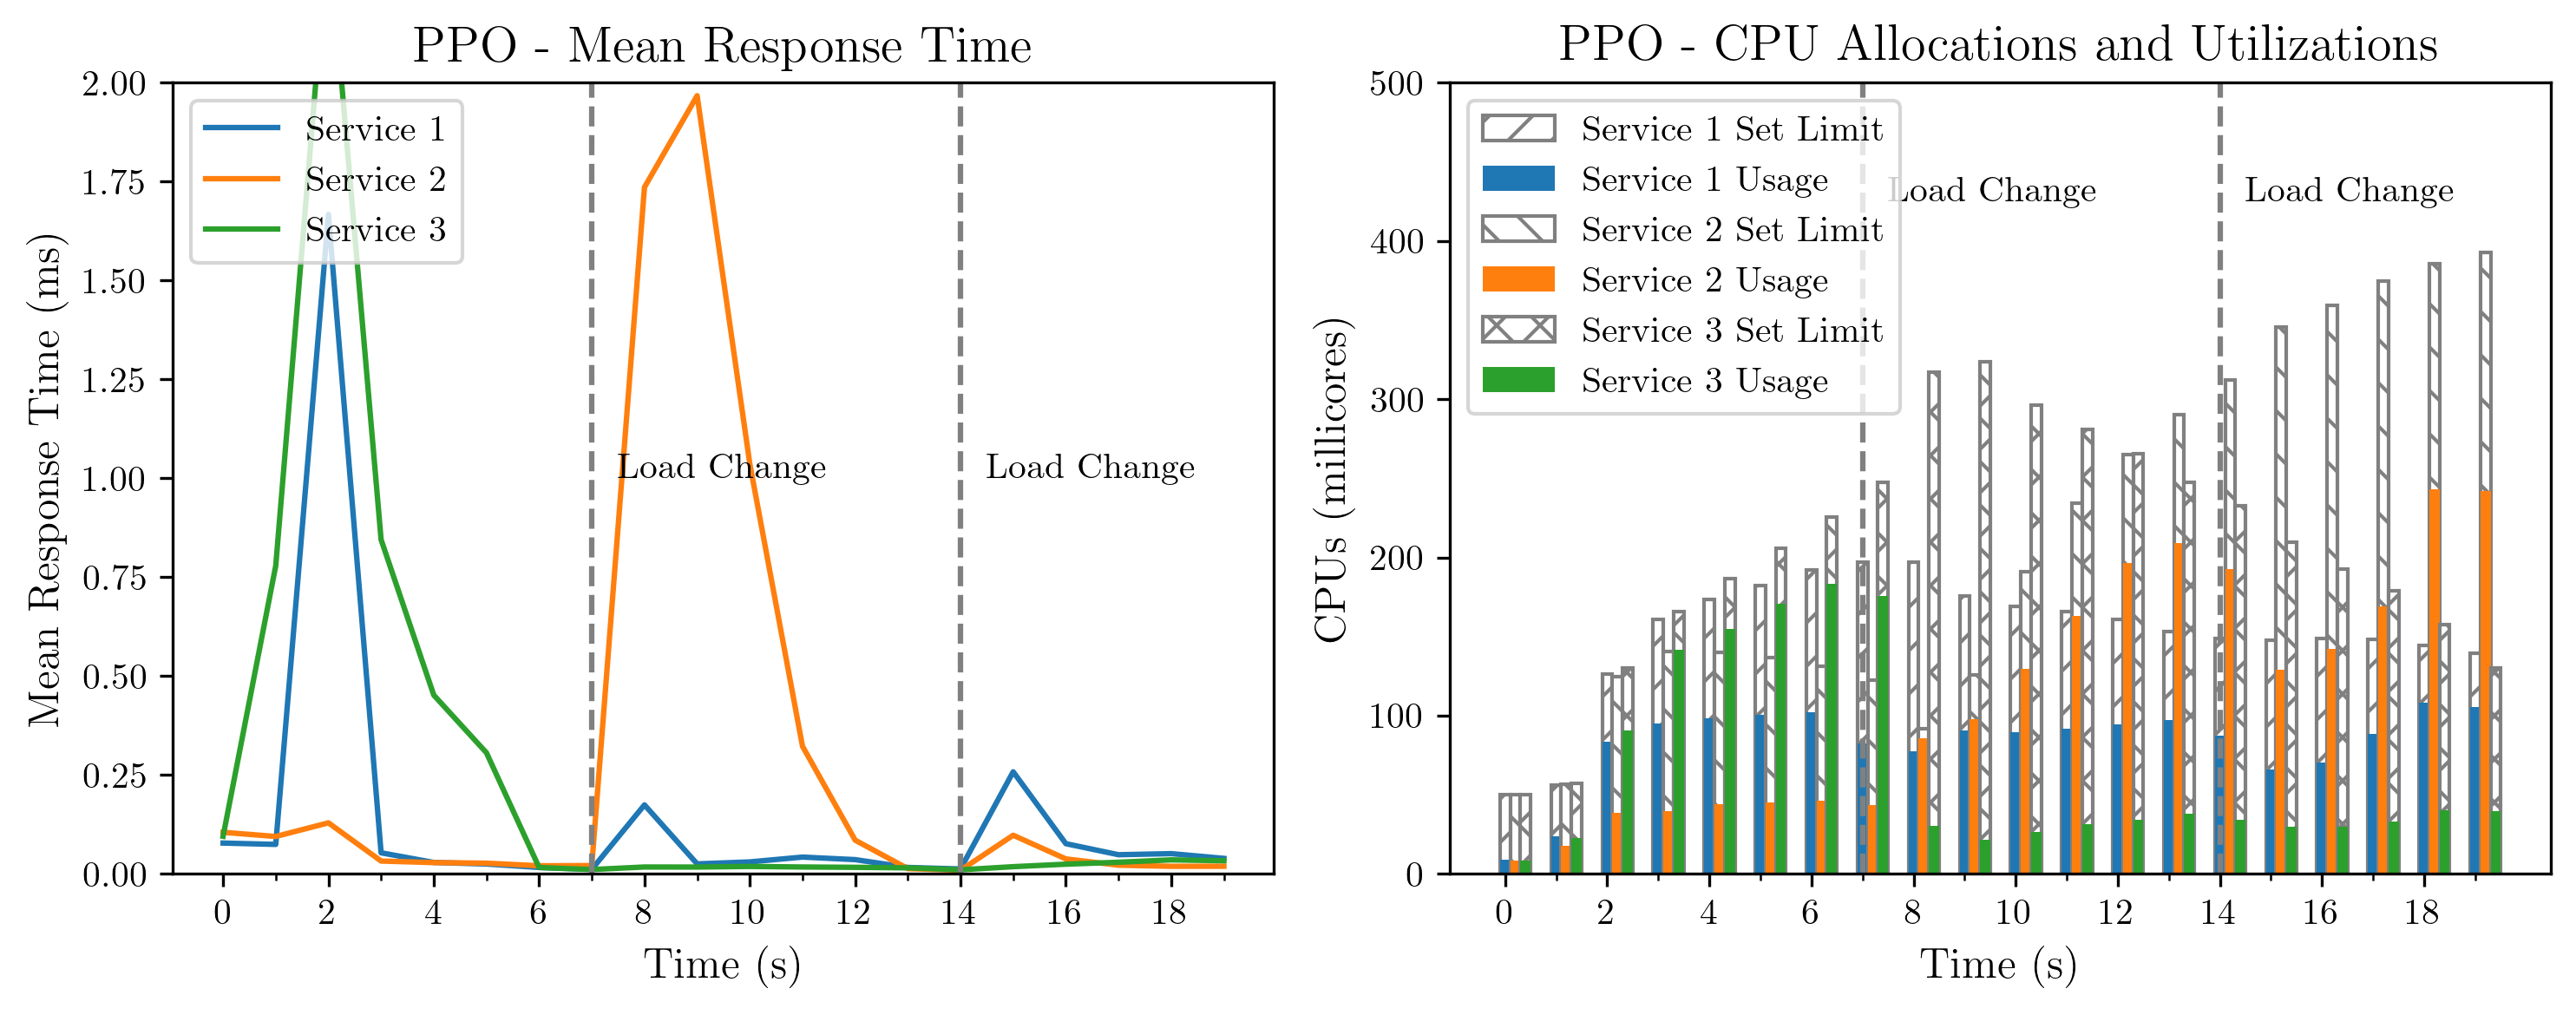

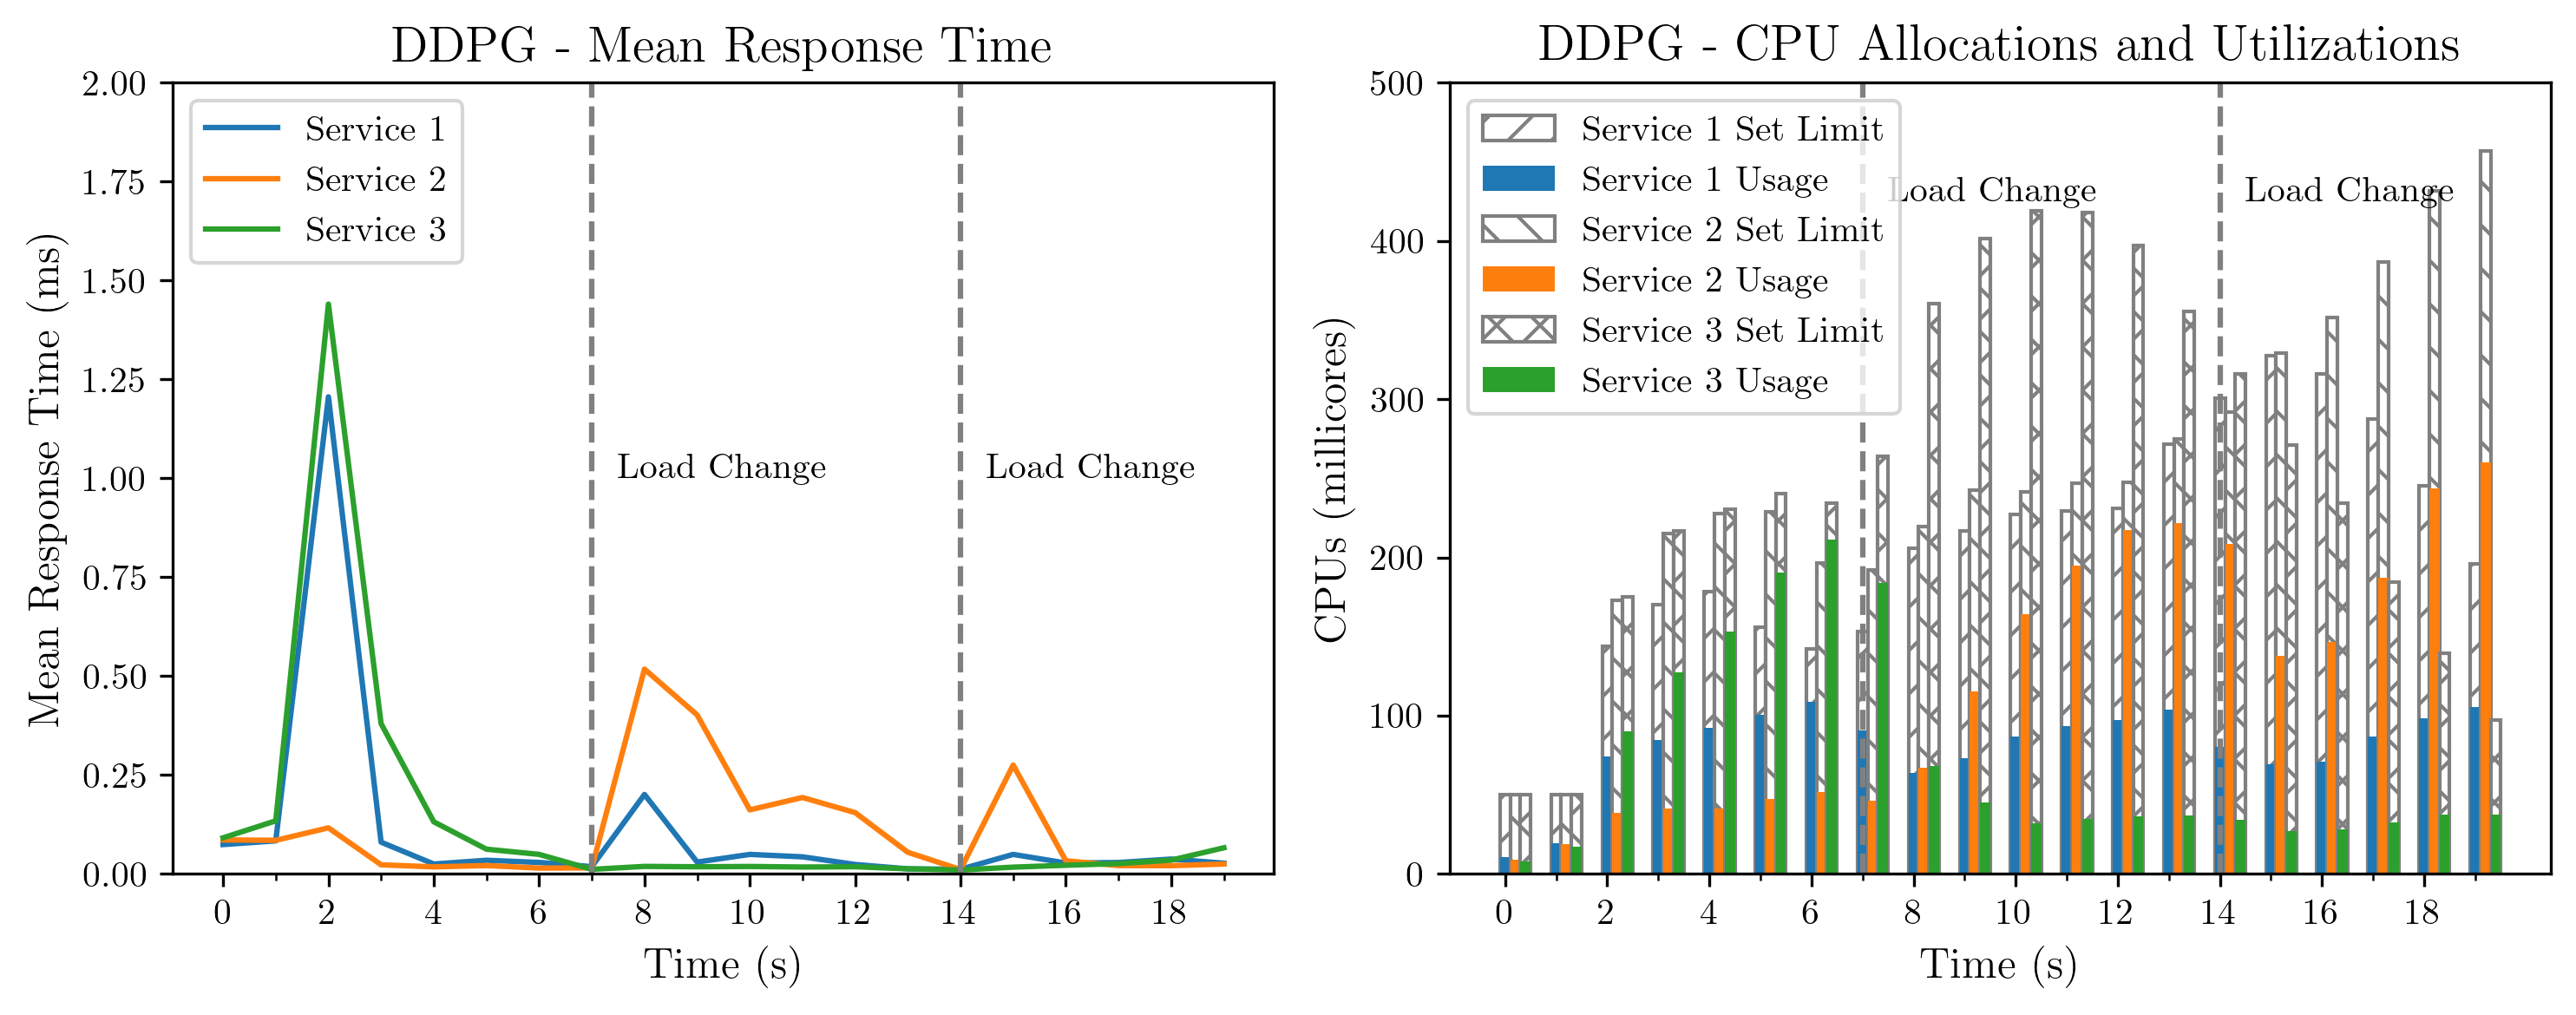

In [4]:
# time_axis = range(len(mean_crec['dqn']))
rts_ylimits = 2.0
crec_ylimits = 500

for alg in algorithms:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=300)
    
    # rts = np.array(rts_dict[alg]).T
    rts = mean_rts_alg[alg]
    container_recordings = mean_crec_alg[alg]
    time_axis = np.arange(len(container_recordings), dtype=int)
    
    third_way_point = len(time_axis) // 3 + 1
    two_third_way_point = 2 * len(time_axis) // 3 + 1
    
    for api_id, rts in rts.items():
        ax1.plot(time_axis, rts, label=f'Service {api_id}') #, linewidth=2)

    ax1.set_xlabel('Time (s)', fontsize=12)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=12)
    if alg == 'thold':
        ax1.set_title(f'Heuristic - Mean Response Time', fontsize=14)
    else:
        ax1.set_title(f'{alg.upper()} - Mean Response Time', fontsize=14)
    ax1.legend(loc='upper left', fontsize=10)
    ax1.set_ylim(0, rts_ylimits)

    ax1.axvline(third_way_point, color='gray', linestyle='--')
    ax1.axvline(two_third_way_point, color='gray', linestyle='--')
    ax1.text(third_way_point + 0.5, 1, 'Load Change', color='black', fontsize=10)
    ax1.text(two_third_way_point + 0.5, 1, 'Load Change', color='black', fontsize=10)

    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 5 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    hatches = ['//', '\\\\', 'xx']
    for service_idx, container_recording in enumerate(zip(*container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)
        
        x_pos = np.array(time_axis) + 0.2 * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.2, label=f'Service {service_idx + 1} Set Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx]) #, linewidth=1.5)
        ax2.bar(x_pos, cpu_usages, width=0.2, label=f'Service {service_idx + 1} Usage')

    ax2.axvline(third_way_point, color='gray', linestyle='--')
    ax2.axvline(two_third_way_point, color='gray', linestyle='--')
    ax2.text(third_way_point + 0.5, 425, 'Load Change', color='black', fontsize=10)
    ax2.text(two_third_way_point + 0.5, 425, 'Load Change', color='black', fontsize=10)

    ax2.set_xlabel('Time (s)', fontsize=12)
    ax2.set_ylabel('CPUs (millicores)', fontsize=12)
    if alg == 'thold':
        ax2.set_title(f'Heuristic - CPU Allocations and Utilizations', fontsize=14)
    else:
        ax2.set_title(f'{alg.upper()} - CPU Allocations and Utilizations', fontsize=14)
    ax2.legend(loc='upper left', fontsize=10)
    ax2.set_ylim(0, crec_ylimits)

    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 5 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    plt.tight_layout()
    plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

rts_ylimits = 2.0
crec_ylimits = 500

# Define the algorithms
algorithms = ['thold', 'dqn', 'ppo', 'ddpg']

for algorithm in algorithms:
    response_times = mean_rts_alg[algorithm]
    container_recordings = mean_crec_alg[algorithm]
    time_axis = np.arange(len(container_recordings), dtype=int)
    
    # Plus one to sync
    third_way_point = len(time_axis) // 3 + 1
    two_third_way_point = 2 * len(time_axis) // 3 + 1

    ### Plot 1: Mean Response Times ###
    fig, ax1 = plt.subplots(figsize=(4.8, 3.6), dpi=300)
    for api_id, rts in response_times.items():
        ax1.plot(time_axis, rts, label=f'Service {api_id}')

    ax1.set_xlabel('Time (s)', fontsize=16)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=16)
    # if algorithm == 'thold':
    #     ax1.set_title(f'Heuristic - Mean Response Time', fontsize=14)
    # else:
    #     ax1.set_title(f'{algorithm.upper()} - Mean Response Time', fontsize=14)
    ax1.legend(loc='upper left', fontsize=10)
    ax1.set_ylim(0, rts_ylimits)

    # Adding indicators at each third of the process
    ax1.axvline(third_way_point, color='gray', linestyle='--')
    ax1.axvline(two_third_way_point, color='gray', linestyle='--')
    ax1.text(third_way_point + 0.5, 1.75, 'Load Change', color='black', fontsize=12)
    ax1.text(two_third_way_point + 0.5, 1.75, 'Load Change', color='black', fontsize=12)

    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 2 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels


    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()
    # plt.savefig(f'figures/priorities/{algorithm}_response_times.pdf')
    # plt.show()
    plt.close(fig)

    ### Plot 2: CPU Allocations and Utilizations ###
    fig, ax2 = plt.subplots(figsize=(4.8, 3.6), dpi=300)
    hatches = ['//', '\\\\', 'xx']  # Different hatching patterns
    for service_idx, container_recording in enumerate(zip(*container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)

        # Shift bars slightly to avoid overlap
        x_pos = np.array(time_axis) + 0.25 * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.25, label=f'Service {service_idx + 1} Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx])
        ax2.bar(x_pos, cpu_usages, width=0.25, label=f'Service {service_idx + 1} Usage')

    # Adding indicators at each third of the process
    ax2.axvline(third_way_point, color='gray', linestyle='--')
    ax2.axvline(two_third_way_point, color='gray', linestyle='--')
    ax2.text(third_way_point + 0.5, 425, 'Load Change', color='black', fontsize=12)
    ax2.text(two_third_way_point + 0.5, 425, 'Load Change', color='black', fontsize=12)

    ax2.set_xlabel('Time (s)', fontsize=16)
    ax2.set_ylabel('CPUs (millicores)', fontsize=16)
    # if algorithm == 'thold':
    #     ax2.set_title(f'Heuristic - CPU Allocations and Utilizations', fontsize=14)
    # else:
    #     ax2.set_title(f'{algorithm.upper()} - CPU Allocations and Utilizations', fontsize=14)
    ax2.legend(loc='upper left', fontsize=10)
    ax2.set_ylim(0, crec_ylimits)

    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 2 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()
    # plt.savefig(f'figures/priorities/{algorithm}_utilizations.pdf')
    # plt.show()
    plt.close(fig)

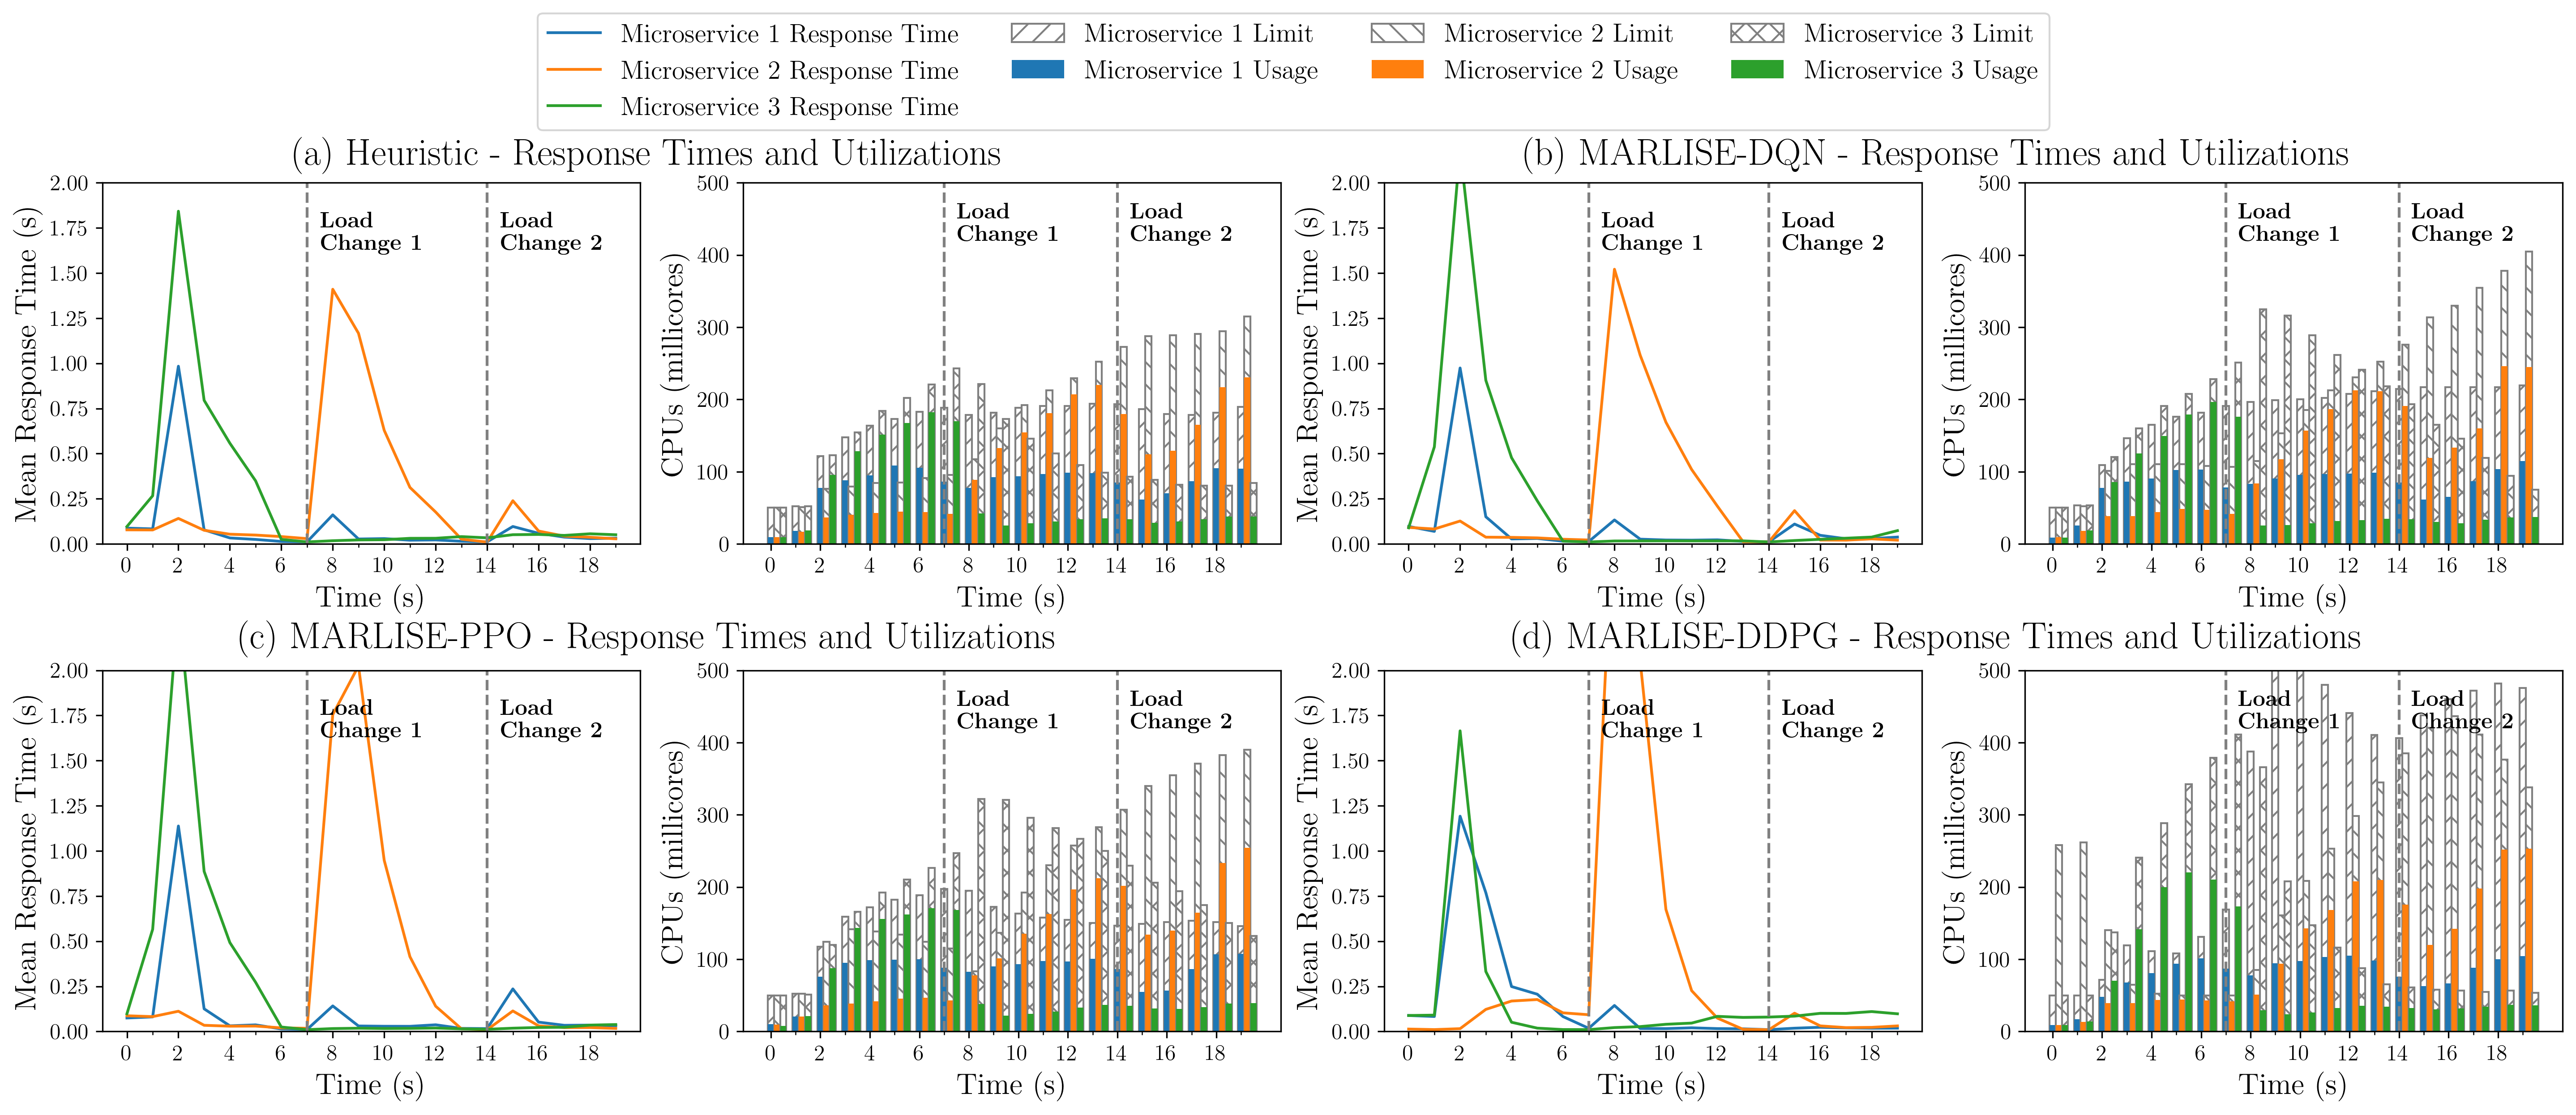

In [7]:

rts_ylimits = 2.0
crec_ylimits = 500

fig, axs = plt.subplots(2, 4, figsize=(19.2, 7.2), dpi=300)  # Create a 2x4 grid of subplots

labels = ['a', 'b', 'c', 'd']

for idx, algorithm in enumerate(algorithms):
    response_times = mean_rts_alg[algorithm]
    container_recordings = mean_crec_alg[algorithm]
    time_axis = np.arange(len(container_recordings), dtype=int)
    
    # Plus one to sync
    third_way_point = len(time_axis) // 3 + 1
    two_third_way_point = 2 * len(time_axis) // 3 + 1

    row, col = divmod(idx, 2)

    ### Plot 1: Mean Response Times ###
    ax1 = axs[row, col * 2]
    for api_id, rts in response_times.items():
        ax1.plot(time_axis, rts, label=f'Microservice {api_id} Response Time')

    ax1.set_xlabel('Time (s)', fontsize=16)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=16)
    ax1.set_ylim(0, rts_ylimits)

    # Adding indicators at each third of the process
    ax1.axvline(third_way_point, color='gray', linestyle='--')
    ax1.axvline(two_third_way_point, color='gray', linestyle='--')
    ax1.text(third_way_point + 0.5, 1.75, r'\noindent\textbf{Load \\ Change 1}', color='black', fontsize=12)
    ax1.text(two_third_way_point + 0.5, 1.75, r'\noindent\textbf{Load \\ Change 2}', color='black', fontsize=12)

    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 2 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=10)

    # Add label to the subplot
    # if algorithm == 'thold':
    #     fig.text(-0.1, 1.1, f'({labels[idx]}) Heuristic - Response Times and Utilizations', transform=ax1.transAxes, size=20, weight='bold')
    # else:
    #     fig.text(-0.1, 1.1, f'({labels[idx]}) {algorithm.upper()} - Response Times and Utilizations', transform=ax1.transAxes, size=20, weight='bold')

    ### Plot 2: CPU Allocations and Utilizations ###
    ax2 = axs[row, col * 2 + 1]
    hatches = ['//', '\\\\', 'xx']  # Different hatching patterns
    for service_idx, container_recording in enumerate(zip(*container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)

        # Shift bars slightly to avoid overlap
        x_pos = np.array(time_axis) + 0.25 * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.25, label=f'Microservice {service_idx + 1} Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx])
        ax2.bar(x_pos, cpu_usages, width=0.25, label=f'Microservice {service_idx + 1} Usage')

    ax2.set_xlabel('Time (s)', fontsize=16)
    ax2.set_ylabel('CPUs (millicores)', fontsize=16)
    ax2.set_ylim(0, crec_ylimits)

    # Adding indicators at each third of the process
    ax2.axvline(third_way_point, color='gray', linestyle='--')
    ax2.axvline(two_third_way_point, color='gray', linestyle='--')
    ax2.text(third_way_point + 0.5, 450, r'\noindent\textbf{Load \\ Change 1}', color='black', fontsize=12)
    ax2.text(two_third_way_point + 0.5, 450, r'\noindent\textbf{Load \\ Change 2}', color='black', fontsize=12)

    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 2 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='minor', labelsize=10)

    # Add label to the subplot
    # ax2.text(-0.1, 1.1, f'({labels[idx]})', transform=ax2.transAxes, size=20, weight='bold')

    if algorithm == 'thold':
        fig.text(0.25 + (col * 0.5), 1 - (row * 0.5) - 0.01, f'({labels[idx]}) Heuristic - Response Times and Utilizations', 
                 ha='center', size=20, weight='bold')
    else:
        fig.text(0.25 + (col * 0.5), 1 - (row * 0.5) - 0.01, f'({labels[idx]}) {"MARLISE-" + algorithm.upper()} - Response Times and Utilizations', 
                 ha='center', size=20, weight='bold')

# Create custom legend entries
# custom_legend = [Patch(facecolor='white', edgecolor='gray', hatch='//', label='CPU Limits')]
ax1handles, ax1labels = ax1.get_legend_handles_labels()
ax2handles, ax2labels = ax2.get_legend_handles_labels()
fig.legend(handles=ax1handles + ax2handles, labels=ax1labels + ax2labels, loc='upper center', fontsize=14, 
           ncol=len(ax1handles + ax2handles) - 5, bbox_to_anchor=(0.5, 1.16))

plt.tight_layout()
fig.subplots_adjust(hspace=0.35)

plt.savefig('figures/all_priorities.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)